<a href="https://colab.research.google.com/github/AkankshaKapil/AkankshaKapil/blob/main/Learning_rate_and_Optimizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To observe the result of different learning rate of network for given dataset

In [ ]:
 from sklearn.datasets import make_blobs # makes_blobs help us create artifical dataset
 import matplotlib.pyplot as plt  #helps in displaying the images
 from numpy import where

In [ ]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=0.3)#1000 samples we have 2 features there should be 3 classes stand deviation is .3. x means feature and y means label

In [ ]:
x[0]#x[0] means feature correspnding to first sample

array([5.69629026, 5.4412244 ])

In [ ]:
y[0]

2

In [ ]:
x[100]

array([6.10527643, 5.47320017])

In [ ]:
y[100]

2

Text(0, 0.5, 'Feature2')

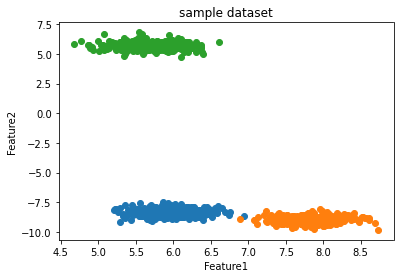

In [ ]:
for labels in range(3):
  row=where(y==labels)
  plt.scatter(x[row,0],x[row,1])
plt.title('sample dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

In [ ]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=0.8)

Text(0, 0.5, 'Feature2')

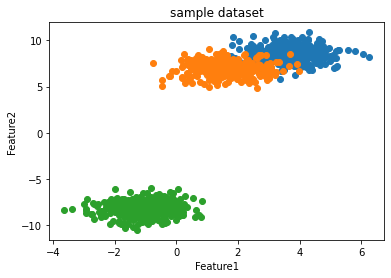

In [ ]:
for labels in range(3):
  row=where(y==labels)
  plt.scatter(x[row,0],x[row,1])
plt.title('sample dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

In [ ]:
x,y=make_blobs(n_samples=1000,centers=2,n_features=2,cluster_std=0.9)#changing the number of cluster 

Text(0, 0.5, 'Feature2')

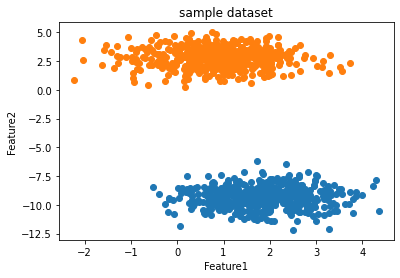

In [ ]:
for labels in range(3):
  row=where(y==labels)
  plt.scatter(x[row,0],x[row,1])
plt.title('sample dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

In [ ]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=0.9)

Text(0, 0.5, 'Feature2')

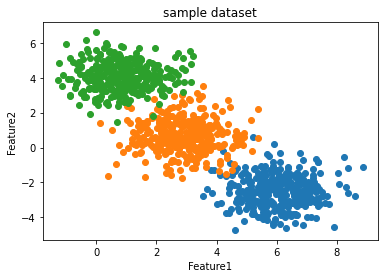

In [ ]:
for labels in range(3):
  row=where(y==labels)
  plt.scatter(x[row,0],x[row,1])
plt.title('sample dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
y=to_categorical(y)

In [ ]:
y[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
n_train=800
train_x,test_x=x[:n_train,:],x[n_train:,:]#0 to 800 rows all columns,800 to 1000rows and all column#200 are the test sample

In [ ]:
train_y,test_y=y[:n_train,:],y[n_train:,:]

In [ ]:
from keras.layers import Dense 
from keras.models import Sequential


In [ ]:
model=Sequential()#sequential means layer are added one after another
model.add(Dense(50,input_dim=2,activation='relu'))#input dim mean number of inputs in input layer
model.add(Dense(3,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
'''opt=SGD(lr=.001)
model.compile(loss='catogorical_crossentrophy',optimizer=opt,metrics='accuracy')
history=model.fit(train_x,train_y,validation_data=(test_x,test_y))
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['validation'],label='validation')'''

"opt=SGD(lr=.001)\nmodel.compile(loss='catogorical_crossentrophy',optimizer=opt,metrics='accuracy')\nhistory=model.fit(train_x,train_y,validation_data=(test_x,test_y))\nplt.plot(history.history['accuracy'],label='train')\nplt.plot(history.history['validation'],label='validation')"

In [ ]:
def fit_model(train_x,train_y,test_x,test_y,lrate):
  model=Sequential()#sequential means layer are added one after another
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))#input dim mean number of inputs in input layer
  model.add(Dense(3,activation='softmax'))
  opt=SGD(learning_rate=lrate)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics='accuracy')
  history=model.fit(train_x,train_y,validation_data=(test_x,test_y), epochs=200 ,verbose=0)
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='test')
  plt.title('lrate'+str(lrate))




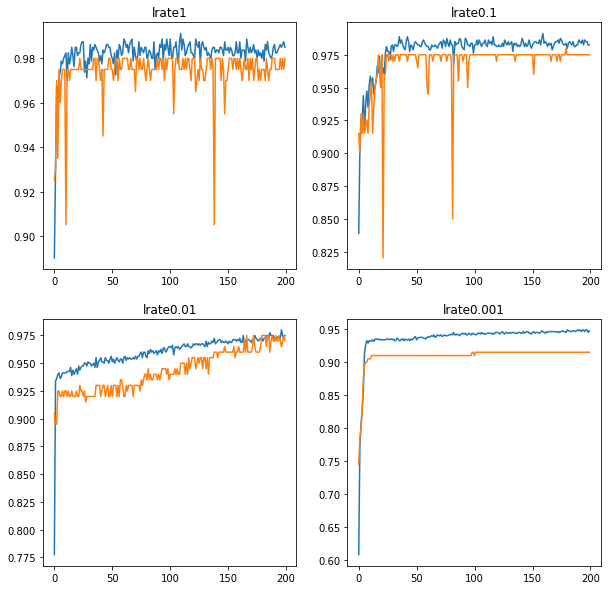

In [ ]:
learning_rates=[1,0.1,0.01,0.001]
ln=len(learning_rates)
plt.figure(figsize=(10,10))
for i in range(ln):
  plt.subplot(2,2,i+1)
  fit_model(train_x,train_y,test_x,test_y,learning_rates[i])

Conclusion

Artifical neural network with 1 neural layer is build to classify 3 classes of the given dataset .stocahstic gradient decent algo with diff learning rate is used to train the network to  classify the samples results show that for learning_rate=1 accuracy is osilating this is because the lr is too high
for learning rate =.1 osilations are reduced and training  and validation accuracy 
for learning rate =0.01 traning acc is more that valacc(overfitting increase samples  )
more validacc shows we should add more hidden layer 
for lr .001 training anf validation are lesser than lr 0.01 
so learning rate 0.01 is showing best acc among the all learning rate 

**Exp** 5 


To evaluate the given network for different optimizer

In [ ]:
def fit_model(train_x,train_y,test_x,test_y,mom):
  model=Sequential()#sequential means layer are added one after another
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))#input dim mean number of inputs in input layer
  model.add(Dense(3,activation='softmax'))
  opt=SGD(learning_rate=0.01,momentum=mom)
  model.compile(loss='categorical_crossentropy',optimizer=opt,metrics='accuracy')
  history=model.fit(train_x,train_y,validation_data=(test_x,test_y), epochs=200 ,verbose=0)
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='test')
  plt.title('Momentum'+str(mom))


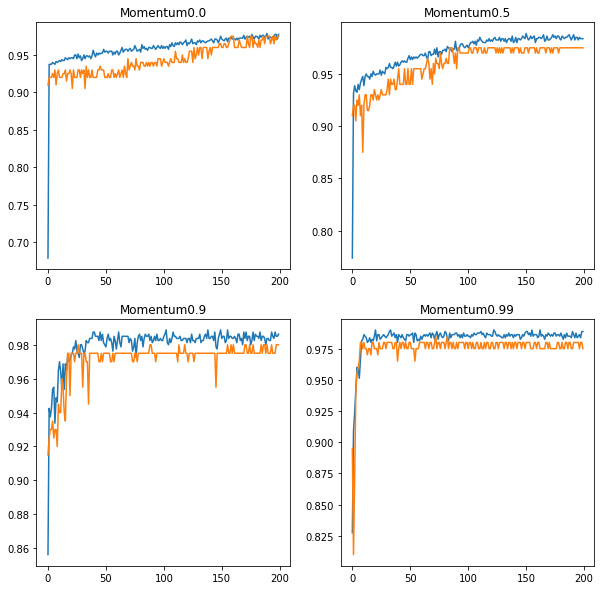

In [ ]:
mom_values=[0.0,0.5,0.9,0.99]
ln=len(mom_values)
plt.figure(figsize=(10,10))
for i in range(ln):
  plt.subplot(2,2,i+1)
  fit_model(train_x,train_y,test_x,test_y,mom_values[i])

In [ ]:

def fit_model(train_x,train_y,test_x,test_y,optmz):
  model=Sequential()#sequential means layer are added one after another
  model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))#input dim mean number of inputs in input layer
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer=optmz,metrics='accuracy')
  history=model.fit(train_x,train_y,validation_data=(test_x,test_y), epochs=200 ,verbose=0)
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='test')
  plt.title('Optimizer'+ optmz)
  

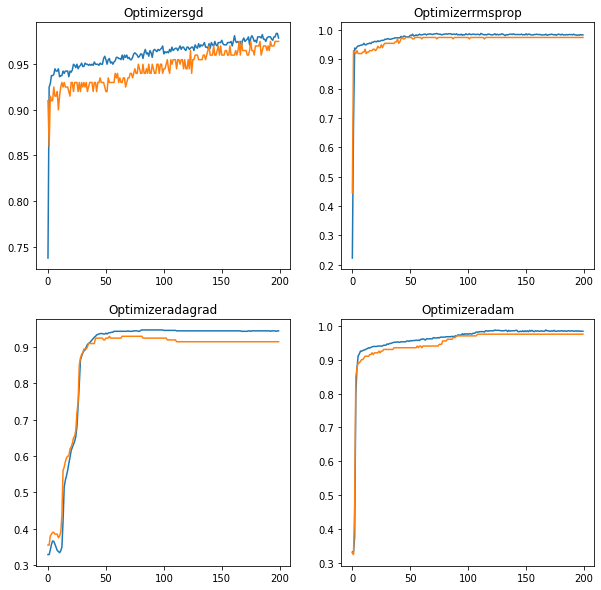

In [ ]:
opt=['sgd','rmsprop','adagrad','adam']
ln=len(opt)
plt.figure(figsize=(10,10))
for i in range(ln):
  plt.subplot(2,2,i+1)
  fit_model(train_x,train_y,test_x,test_y,opt[i])

SGD optimzer with momentum is used to train the network to classify the samples if momentum is mom=0 val acc is oscilation more than the acc for the other values of momentum among all the values of momentum training and validation acc is amlost same for 0.99 also thetraining is converging in about 10 epochs when no momentum is used the acc is achevied in 30 epochs and using momentum we get acc at 10 epochs For the given datadet network is trained for diff optimizer, rmsprop is best acc is least no of epoch